---
title: Palmer Penguins Modeling

author: "Deepika Agarwal"
format:
  html:
    embed-resources: true
echo: true
---



Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [133]:
!pip install palmerpenguins

In [134]:
# Import libraries
import numpy as np
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal

In [135]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [136]:
penguins = penguins.dropna() #removing the missing values from the dataframe
penguins["bill_length_mm"].describe()

count    333.000000
mean      43.992793
std        5.468668
min       32.100000
25%       39.500000
50%       44.500000
75%       48.600000
max       59.600000
Name: bill_length_mm, dtype: float64

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

# Model 1 : Using Flipper Length and Bill Length

In [137]:
# define the training data
X = penguins[['flipper_length_mm', 'bill_length_mm']]  # predictor variable
y = penguins['bill_depth_mm']      # response variable

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [139]:
bill_model1 = LinearRegression() # specifying model for prediction
bill_model1.fit(X_train, y_train)

LinearRegression()

In [140]:
bill_model1.coef_, bill_model1.intercept_

(array([-0.11069922,  0.1239597 ]), np.float64(33.958369492515985))

In [141]:
# Train MSE
y_pred_train = bill_model1.predict(X_train)
mse_model1_train = mean_squared_error(y_train, y_pred_train)

print("Mean Squared Error for Training Data in Model 1:", mse_model1_train)

Mean Squared Error for Training Data in Model 1: 2.3310253908228793


In [142]:
# Test MSE
y_pred_test = bill_model1.predict(X_test)
mse_model1_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error for Test Data in Model 1:", mse_model1_test)

Mean Squared Error for Test Data in Model 1: 2.775764178848919


# Model 2 : Using Flipper Length, Bill Length, and Body Mass

In [143]:
# define the training data
X = penguins[['flipper_length_mm', 'bill_length_mm', "body_mass_g"]]  # predictor variable
y = penguins['bill_depth_mm']      # response variable

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [145]:
bill_model2 = LinearRegression() # specifying model for prediction
bill_model2.fit(X_train, y_train)

LinearRegression()

In [146]:
bill_model2.coef_, bill_model2.intercept_

(array([-1.11480241e-01,  1.23850872e-01,  1.60203078e-05]),
 np.float64(34.05265089253985))

In [147]:
# Train MSE
y_pred_train = bill_model2.predict(X_train)
mse_model2_train = mean_squared_error(y_train, y_pred_train)

print("Mean Squared Error for Training Data in Model 2:", mse_model2_train)

Mean Squared Error for Training Data in Model 2: 2.3309861807461374


In [148]:
# Test MSE
y_pred_test = bill_model2.predict(X_test)
mse_model2_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error for Test Data in Model 2:", mse_model2_test)

Mean Squared Error for Test Data in Model 2: 2.770400694980681


#Model 3: Using Flipper Length, Bill Length, Body Mass, and Species

In [149]:
# define the training data
X = penguins[['flipper_length_mm', 'bill_length_mm', "body_mass_g", "species"]]  # predictor variable
y = penguins['bill_depth_mm']      # response variable

In [150]:
# One-hot encoding
X_enc = pd.get_dummies(X, drop_first = True)
X_enc.head()

,flipper_length_mm,bill_length_mm,body_mass_g,species_Chinstrap,species_Gentoo
0,181.0,39.1,3750.0,False,False
1,186.0,39.5,3800.0,False,False
2,195.0,40.3,3250.0,False,False
4,193.0,36.7,3450.0,False,False
5,190.0,39.3,3650.0,False,False


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size = 0.25, random_state = 123)

In [152]:
bill_model3 = LinearRegression() # specifying model for prediction
bill_model3.fit(X_train, y_train)

LinearRegression()

In [153]:
bill_model3.coef_, bill_model3.intercept_

(array([ 2.14763102e-02,  1.08774887e-01,  9.22462198e-04, -1.00340594e+00, -6.13021770e+00]),
 np.float64(6.564431097542743))

In [154]:
# Train MSE
y_pred_train = bill_model3.predict(X_train)
mse_model3_train = mean_squared_error(y_train, y_pred_train)

print("Mean Squared Error for Training Data in Model 3:", mse_model3_train)

Mean Squared Error for Training Data in Model 3: 0.6536994219364559


In [155]:
# Test MSE
y_pred_test = bill_model3.predict(X_test)
mse_model3_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error for Test Data in Model 3:", mse_model3_test)

Mean Squared Error for Test Data in Model 3: 0.8431851543892934


#Model 4: Using Flipper Length, Bill Length, Body Mass, Species, Sex, and Island

In [156]:
# define the training data
X = penguins[['flipper_length_mm', 'bill_length_mm', "body_mass_g", "species", "sex", "island"]]  # predictor variable
y = penguins['bill_depth_mm']      # response variable

In [157]:
# One-hot encoding
X_enc = pd.get_dummies(X, drop_first = True)
X_enc.head()

,flipper_length_mm,bill_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,sex_male,island_Dream,island_Torgersen
0,181.0,39.1,3750.0,False,False,True,False,True
1,186.0,39.5,3800.0,False,False,False,False,True
2,195.0,40.3,3250.0,False,False,False,False,True
4,193.0,36.7,3450.0,False,False,False,False,True
5,190.0,39.3,3650.0,False,False,True,False,True


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size = 0.25, random_state = 123)

In [159]:
bill_model4 = LinearRegression() # specifying model for prediction
bill_model4.fit(X_train, y_train)

LinearRegression()

In [160]:
bill_model4.coef_, bill_model4.intercept_

(array([ 1.72605347e-02,  5.14417484e-02,  4.45554131e-04, -2.45562485e-01, -4.84313292e+00,  8.94141660e-01,
        -1.70155763e-01,  1.06614094e-01]),
 np.float64(10.94660576354909))

In [161]:
# Train MSE
y_pred_train = bill_model4.predict(X_train)
mse_model4_train = mean_squared_error(y_train, y_pred_train)

print("Mean Squared Error for Training Data in Model 4:", mse_model4_train)

Mean Squared Error for Training Data in Model 4: 0.5743050366791886


In [162]:
# Test MSE
y_pred_test = bill_model4.predict(X_test)
mse_model4_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error for Test Data in Model 4:", mse_model4_test)

Mean Squared Error for Test Data in Model 4: 0.7470774160758619


Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [163]:
mse_train = [mse_model1_train, mse_model2_train, mse_model3_train, mse_model4_train]
mse_test = [mse_model1_test, mse_model2_test, mse_model3_test, mse_model4_test]
predictors_num = [2, 3, 4, 6]

df = pd.DataFrame({"Number_of_Predictors": predictors_num,
                   "MSE_train": mse_train,
                   "MSE_test": mse_test})
df

,Number_of_Predictors,MSE_train,MSE_test
0,2,2.331025,2.775764
1,3,2.330986,2.770401
2,4,0.653699,0.843185
3,6,0.574305,0.747077


In [164]:
# Reshape to long format for plotnine
df_long = df.melt(id_vars='Number_of_Predictors',
                  value_vars=['MSE_train', 'MSE_test'],
                  var_name='Dataset',
                  value_name='MSE')
df_long

,Number_of_Predictors,Dataset,MSE
0,2,MSE_train,2.331025
1,3,MSE_train,2.330986
2,4,MSE_train,0.653699
3,6,MSE_train,0.574305
4,2,MSE_test,2.775764
5,3,MSE_test,2.770401
6,4,MSE_test,0.843185
7,6,MSE_test,0.747077


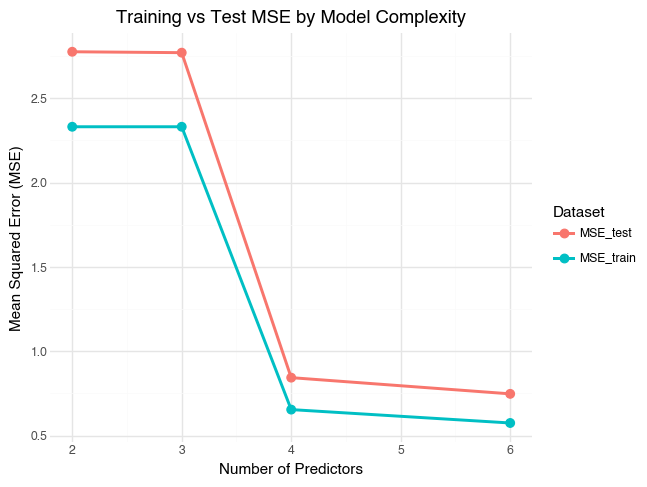

In [165]:
# Plot with plotnine
plot = (
    ggplot(df_long, aes(x='Number_of_Predictors', y='MSE', color='Dataset'))
    + geom_line(size=1.2)
    + geom_point(size=3)
    + labs(
        title='Training vs Test MSE by Model Complexity',
        x='Number of Predictors',
        y='Mean Squared Error (MSE)'
    )
    + theme_minimal()
)

plot

Which of your models was best? Model 4, with six predictor variables (flipper_length_mm, bill_length_mm, body_mass_g, species, sex, and island), is the best model because it has the lowest Mean Squared Error (MSE) for both the training and test data. This means it fits the data well and gives good predictions without significant overfitting or underfitting.